In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np
df = pd.read_csv(r'C:\Users\stuar\Documents\bank.csv', delimiter=';')

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# 1:Using 'age' and 'duration' to predict y by perceptron

In [3]:
# Selecting two features:"age' and 'duration' and one outcome 'y'
X = df.iloc[:, [0, 11]]
y = df.iloc[:, 16]
y = np.where(y == 'no', 0, 1)
X.head()

,age,duration
0,30,79
1,33,220
2,35,185
3,30,199
4,59,226


In [4]:
# Splitting data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))
X.tail()

Labels counts in y: [4000  521]
Labels counts in y_train: [2799  365]
Labels counts in y_test: [1201  156]


,age,duration
4516,33,329
4517,57,153
4518,57,151
4519,28,129
4520,44,345


In [5]:
# Standardizing the features:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# Training a perceptron via scikit-learn
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [7]:
# Outputting misclassified samples
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 242


In [8]:
# Outputting accuracy
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.82


In [9]:
# Defining a plot function for all data
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    
    #plot all data
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [10]:
# Defining a plot function for test data
def plot_test_data(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot the test data
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], 
                        y=X_test[y_test == cl, 1],
                        alpha=0.8, 
                        c=colors[idx],
                        marker=markers[idx], 
                        label=cl, 
                        edgecolor='black')

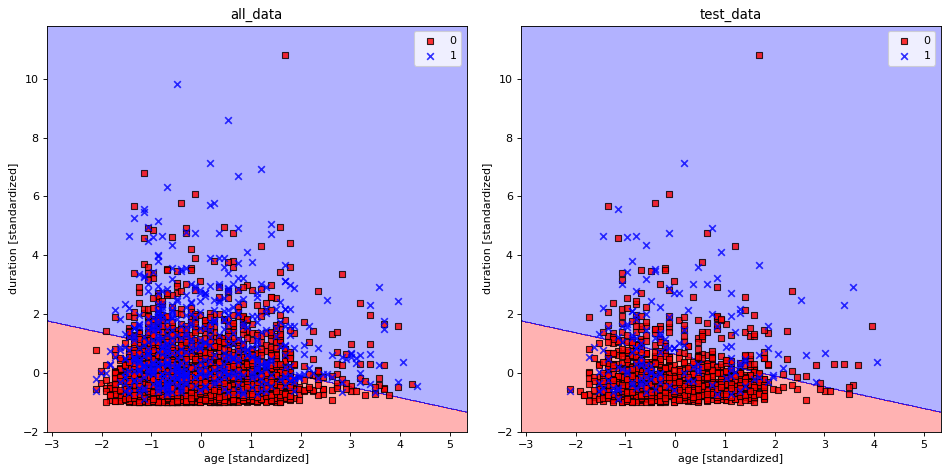

In [11]:
# Visualizing the outcome
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(12,6),dpi=80)
plt.subplot(121)
plot_decision_regions(X=X_combined_std, y=y_combined,
                     classifier=ppn)
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper right')
plt.title("all_data")

plt.subplot(122)
plot_test_data(X=X_combined_std, y=y_combined, classifier=ppn, test_idx= range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper right')
plt.title("test_data")
plt.tight_layout()
plt.show()

# 2: Using 'job' and 'duration' to predict y by logistic regression

In [12]:
# Selecting two features:"job' ,'duration' and one outcome 'y'
X1 = df.iloc[:, [1, 11]]
y1 = df.iloc[:, 16]
MEAN = X1["duration"].mean()
STD = X1["duration"].std()
d = X1["duration"].apply(lambda x: (x - MEAN)) / STD

X1 = X1.drop("duration", axis=1)
X1["duration"] = d

X1= X1.replace(["admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                "blue-collar","self-employed","retired","technician","services"],
               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
y1 = np.where(y1 == 'no', 0, 1)
X1.tail()

,job,duration
4516,11,0.250287
4517,8,-0.427010
4518,10,-0.434706
4519,7,-0.519368
4520,5,0.311859


In [13]:
# Splitting data into training(60%) and test(40%) data
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.4, random_state=1, stratify=y1)

print('Labels counts in y1:', np.bincount(y1))
print('Labels counts in y1_train:', np.bincount(y1_train))
print('Labels counts in y1_test:', np.bincount(y1_test))
print(X1_train.head())

Labels counts in y1: [4000  521]
Labels counts in y1_train: [2399  313]
Labels counts in y1_test: [1601  208]
      job  duration
3639    3  0.473487
3814    0 -0.126844
590     8 -0.680996
1177    8  0.558149
2752    7  0.065570


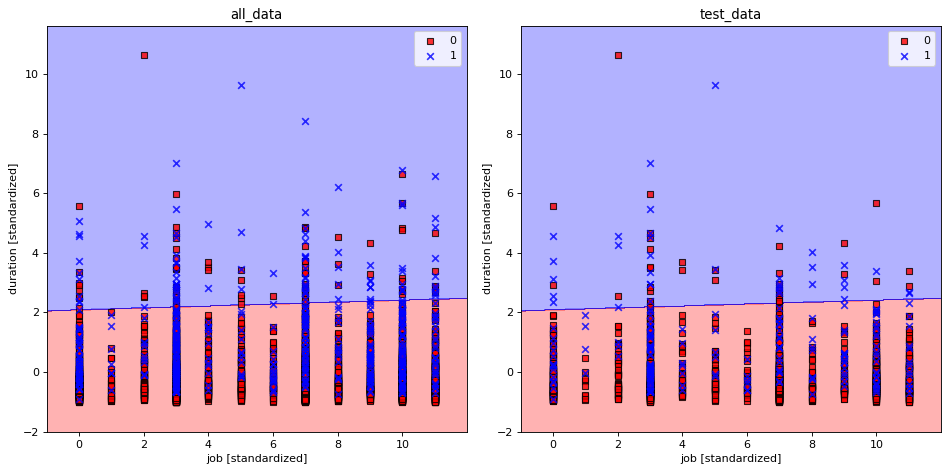

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X1_train, y1_train)

X1_combined = np.vstack((X1_train, X1_test))
y1_combined = np.hstack((y1_train, y1_test))

plt.figure(figsize=(12,6),dpi=80)
plt.subplot(121)
plot_decision_regions(X1_combined, y1_combined,
                      classifier=lr)
plt.xlabel('job [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper right')
plt.title("all_data")

plt.subplot(122)
plot_test_data(X=X1_combined, y=y1_combined, classifier=lr, test_idx= range(2712, 4521))
plt.xlabel('job [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper right')
plt.title("test_data")
plt.tight_layout()
plt.show()

In [15]:
y1_pred = lr.predict(X1_test)
print('Misclassified samples: %d' % (y1_test != y1_pred).sum())

Misclassified samples: 206


In [16]:
print('Accuracy: %.2f' % accuracy_score(y1_test, y1_pred))

Accuracy: 0.89


# 3: Using 'balance' and 'duration' to predict y by SVM

In [18]:
# Selecting two features:"balance' ,'duration' and one outcome 'y'
X2 = df.iloc[:, [5, 11]]
y2 = df.iloc[:, 16]
y2 = np.where(y2 == 'no', 0, 1)
X2.head()

,balance,duration
0,1787,79
1,4789,220
2,1350,185
3,1476,199
4,0,226


In [19]:
# Splitting data into training and test data

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=1, stratify=y)

In [20]:
# Standardizing the features:

sc.fit(X2_train)
X2_train_std = sc.transform(X2_train)
X2_test_std = sc.transform(X2_test)

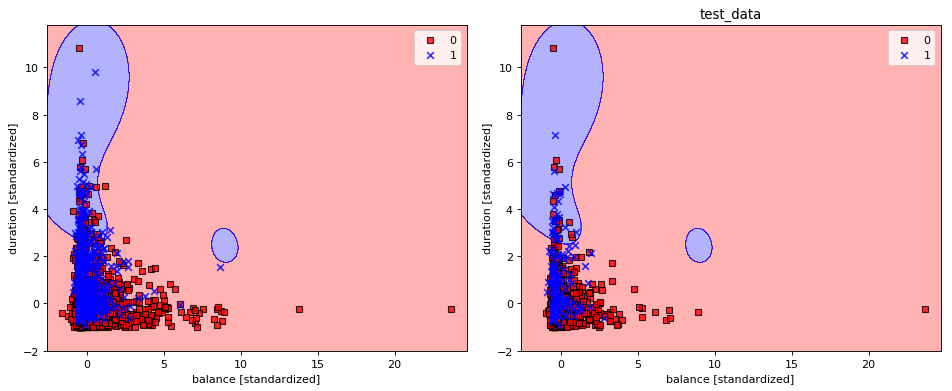

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X2_train_std, y2_train)

X2_combined_std = np.vstack((X2_train_std, X2_test_std))
y2_combined = np.hstack((y2_train, y2_test))

plt.figure(figsize=(12,5),dpi=80)
plt.subplot(121)
plot_decision_regions(X2_combined_std, y2_combined,
                      classifier=svm)
plt.xlabel('balance [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper right')

plt.subplot(122)
plot_test_data(X=X2_combined_std, y=y2_combined, classifier=svm, test_idx= range(3164, 4521))
plt.xlabel('balance [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper right')
plt.title("test_data")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [22]:
y2_pred = svm.predict(X2_test_std)
print('Misclassified samples: %d' % (y2_test != y2_pred).sum())

Misclassified samples: 150


In [23]:
print('Accuracy: %.2f' % accuracy_score(y2_test, y2_pred))

Accuracy: 0.89
